In [1]:
# Install only what we need right now (display + drawing)
!pip -q install opencv-python-headless==4.10.0.84

# Imports
import os, glob
import xml.etree.ElementTree as ET

import cv2
import matplotlib.pyplot as plt

# Make plots a bit larger
plt.rcParams['figure.figsize'] = (8, 6)

print("Ready!")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.7 MB/s eta 0:00:00
Ready!


In [2]:
import glob

# The folder where you uploaded everything
DATA_DIR = "/content"

# List image and xml files
imgs = sorted(glob.glob(os.path.join(DATA_DIR, "*.png")))
xmls = sorted(glob.glob(os.path.join(DATA_DIR, "*.xml")))

print("Found images :", len(imgs))
print("Found xmls   :", len(xmls))
print("\nFirst 3 images:", [os.path.basename(p) for p in imgs[:3]])
print("First 3 xmls  :", [os.path.basename(p) for p in xmls[:3]])


Found images : 433
Found xmls   : 433

First 3 images: ['Cars0.png', 'Cars1.png', 'Cars10.png']
First 3 xmls  : ['Cars0.xml', 'Cars1.xml', 'Cars10.xml']


In [3]:
def read_voc(xml_path):
    """
    Reads one Pascal VOC .xml file.
    Returns a list of (class_name, xmin, ymin, xmax, ymax)
    """
    import xml.etree.ElementTree as ET
    tree = ET.parse(xml_path)
    root = tree.getroot()

    objects = []
    for obj in root.findall("object"):
        name = obj.find("name").text
        bbox = obj.find("bndbox")
        xmin = int(float(bbox.find("xmin").text))
        ymin = int(float(bbox.find("ymin").text))
        xmax = int(float(bbox.find("xmax").text))
        ymax = int(float(bbox.find("ymax").text))
        objects.append((name, xmin, ymin, xmax, ymax))
    return objects


# Quick test: read one XML
sample_xml = xmls[0]
print("Reading:", sample_xml)
print(read_voc(sample_xml))


Reading: /content/Cars0.xml
[('licence', 226, 125, 419, 173)]


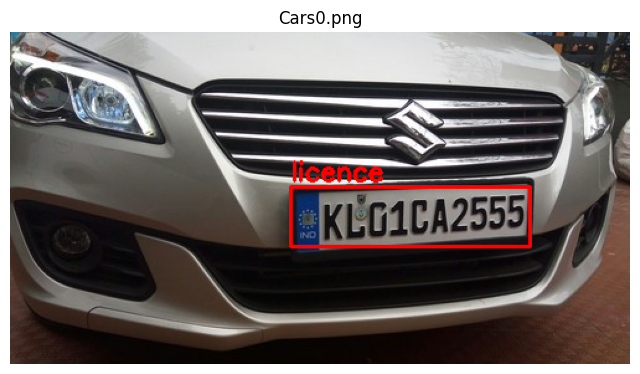

In [4]:
def show_with_bbox(image_path, xml_path):
    # Read image
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Parse xml
    objects = read_voc(xml_path)

    # Draw bounding boxes
    for (cls, xmin, ymin, xmax, ymax) in objects:
        cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)
        cv2.putText(img, cls, (xmin, max(0, ymin - 5)), cv2.FONT_HERSHEY_SIMPLEX,
                    0.7, (255, 0, 0), 2)

    plt.imshow(img)
    plt.axis("off")
    plt.title(os.path.basename(image_path))
    plt.show()


# Try it on the first pair (Cars0.png + Cars0.xml)
sample_img = imgs[0]
sample_xml = xmls[0]
show_with_bbox(sample_img, sample_xml)


Detected Text: FKLG1CA2555


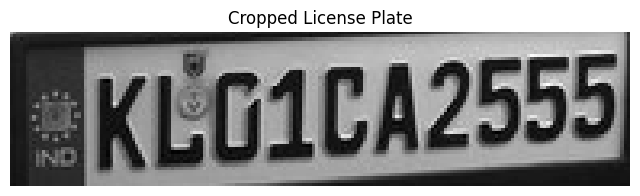

In [5]:
# Install pytesseract (OCR engine)
!pip -q install pytesseract

import pytesseract

def extract_plate_text(image_path, xml_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    objects = read_voc(xml_path)

    for (cls, xmin, ymin, xmax, ymax) in objects:
        # Crop the license plate area
        plate = gray[ymin:ymax, xmin:xmax]

        # OCR (text extraction)
        text = pytesseract.image_to_string(plate, config='--psm 8')
        print("Detected Text:", text.strip())

        # Display the cropped plate
        plt.imshow(plate, cmap='gray')
        plt.title("Cropped License Plate")
        plt.axis('off')
        plt.show()

# Try on the same image
extract_plate_text(sample_img, sample_xml)


In [6]:
import random

def simulate_speed_detection(car_number, limit=60):
    # Simulate random speeds
    speed = random.randint(40, 100)
    print(f"Vehicle: {car_number}")
    print(f"Recorded Speed: {speed} km/h")
    if speed > limit:
        print(f"⚠️ Speed Limit Exceeded! Fine issued for {car_number}.")
    else:
        print("✅ Within Speed Limit.")

# Test it with the OCR result
simulate_speed_detection("KL01CA2555")


Vehicle: KL01CA2555
Recorded Speed: 79 km/h
⚠️ Speed Limit Exceeded! Fine issued for KL01CA2555.
